In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flowers-recognition/flowers/flowers/daisy/5110110938_9da91455c4_m.jpg
/kaggle/input/flowers-recognition/flowers/flowers/daisy/2513618768_ff7c004796_m.jpg
/kaggle/input/flowers-recognition/flowers/flowers/daisy/9094631844_1a6abca29e.jpg
/kaggle/input/flowers-recognition/flowers/flowers/daisy/3780380240_ef9ec1b737_m.jpg
/kaggle/input/flowers-recognition/flowers/flowers/daisy/2641979584_2b21c3fe29_m.jpg
/kaggle/input/flowers-recognition/flowers/flowers/daisy/4993492878_11fd4f5d12.jpg
/kaggle/input/flowers-recognition/flowers/flowers/daisy/2087343668_ef4fb95787_n.jpg
/kaggle/input/flowers-recognition/flowers/flowers/daisy/7633425046_8293e3d0e9_m.jpg
/kaggle/input/flowers-recognition/flowers/flowers/daisy/33872893913_72d64a9b85_n.jpg
/kaggle/input/flowers-recognition/flowers/flowers/daisy/3337643329_accc9b5426.jpg
/kaggle/input/flowers-recognition/flowers/flowers/daisy/4610018126_21f438d2dc_m.jpg
/kaggle/input/flowers-recognition/flowers/flowers/daisy/5765646947_82e95a9cc9_n.j

In [2]:
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder

# Loading Dataset as Dataset is segregated so we are merging the images and creating a new data set to train

 # Steps of preprocessing and generating image from  segregated dataset

# 1: flow from directory
# 2: reading the image
# 3: reshaping it intp (128,128)
# 4: Saving it in list data and label at label list

In [3]:
data = list()
label = list()
IMG_SIZE = 128
for i in os.listdir("../input/flowers-recognition/flowers/daisy"):
    try:
        path = "../input/flowers-recognition/flowers/daisy/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        data.append(img)
        label.append(0)
    except:
        None
for i in os.listdir("../input/flowers-recognition/flowers/dandelion"):
    try:
        path = "../input/flowers-recognition/flowers/dandelion/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        data.append(img)
        label.append(1)
    except:
        None
for i in os.listdir("../input/flowers-recognition/flowers/rose"):
    try:
        path = "../input/flowers-recognition/flowers/rose/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        data.append(img)
        label.append(2)
    except:
        None
for i in os.listdir("../input/flowers-recognition/flowers/sunflower"):
    try:
        path = "../input/flowers-recognition/flowers/sunflower/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        data.append(img)
        label.append(3)
    except:
        None
for i in os.listdir("../input/flowers-recognition/flowers/tulip"):
    try:
        path = "../input/flowers-recognition/flowers/tulip/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        data.append(img)
        label.append(4)
    except:
        None


# Converting Labels using One Hot Encoding

In [4]:
#label = np.array(label)

In [5]:
set(label)

{0, 1, 2, 3, 4}

In [6]:
#encode = OneHotEncoder()

In [7]:
#label = encode.fit_transform(label.reshape(-1,1))

In [8]:
data = np.array(data)

In [9]:
data.shape

(4323, 128, 128, 3)

# Spliting data into training, testing and validation

In [10]:
x_train,x_test,y_train,y_test = tts(data,label,test_size = 0.15,random_state = 0)

In [11]:
x_train_val,x_test_val,y_train_val,y_test_val = tts(x_train,y_train,test_size = 0.15,random_state = 0)

# # A small glips of generated dataset with label

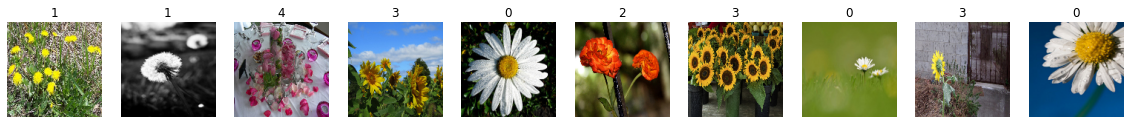

In [12]:
plt.figure(figsize=(20,20))
for i in range(10):
    img = x_train[2*i]
    plt.subplot(1,10,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(y_train[2*i])

# Applying Data Augumentation on x_train for more data generation

In [13]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,  
    samplewise_center=False,  
    featurewise_std_normalization=False,  
    samplewise_std_normalization=False,  
    rotation_range=60, 
    zoom_range = 0.1,  
    width_shift_range=0.1,  
    height_shift_range=0.1,
    shear_range=0.1,
    fill_mode = "reflect"
    ) 

In [14]:
datagen.fit(x_train)

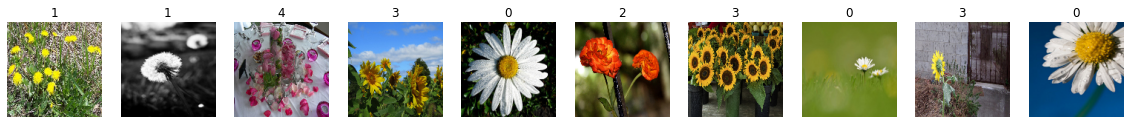

In [15]:
plt.figure(figsize=(20,20))
for i in range(10):
    img = x_train[2*i]
    plt.subplot(1,10,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(y_train[2*i])

# Building the CNN

In [16]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (5, 5), padding = 'Same', activation = 'relu', input_shape = (128, 128, 3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.Dense(5, activation = "softmax"))

In [17]:
#CNN_MODEL = keras.utils.plot_model(model,show_shapes=True,show_layer_names=True)

In [18]:

model.compile(optimizer = 
tf.keras.optimizers.Adam(lr = 0.001), loss = tf.keras.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 96)        5

In [19]:
epoch = 50

In [20]:
history = model.fit(np.array(x_train),np.array(y_train),epochs= epoch,validation_data=(np.array(x_test_val),np.array(y_test_val)))

Epoch 1/50
115/115 [==============================] - 2s 16ms/step - loss: 18.4432 - accuracy: 0.2311 - val_loss: 1.6148 - val_accuracy: 0.1920
Epoch 2/50
115/115 [==============================] - 2s 15ms/step - loss: 1.5984 - accuracy: 0.2447 - val_loss: 1.6193 - val_accuracy: 0.1920
Epoch 3/50
115/115 [==============================] - 2s 13ms/step - loss: 1.5976 - accuracy: 0.2480 - val_loss: 1.6227 - val_accuracy: 0.1920
Epoch 4/50
115/115 [==============================] - 1s 13ms/step - loss: 1.5934 - accuracy: 0.2569 - val_loss: 1.5843 - val_accuracy: 0.2210
Epoch 5/50
115/115 [==============================] - 2s 15ms/step - loss: 1.5745 - accuracy: 0.2583 - val_loss: 1.5596 - val_accuracy: 0.2301
Epoch 6/50
115/115 [==============================] - 2s 14ms/step - loss: 1.5565 - accuracy: 0.2757 - val_loss: 1.5601 - val_accuracy: 0.2717
Epoch 7/50
115/115 [==============================] - 2s 15ms/step - loss: 1.5258 - accuracy: 0.2986 - val_loss: 1.4713 - val_accuracy: 0.337

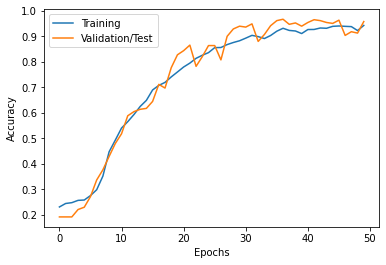

In [21]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(train_acc,label = "Training")
plt.plot(val_acc,label = 'Validation/Test')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

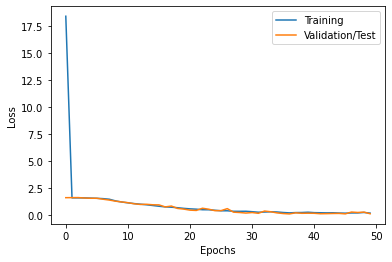

In [22]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss,label = 'Training')
plt.plot(val_loss,label = 'Validation/Test')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [23]:
cnn_pred = model.predict_classes(x_test)

In [24]:
print(classification_report(y_test,cnn_pred))

              precision    recall  f1-score   support

           0       0.64      0.47      0.54       117
           1       0.59      0.82      0.69       160
           2       0.54      0.54      0.54       112
           3       0.74      0.69      0.72       108
           4       0.59      0.49      0.54       152

    accuracy                           0.61       649
   macro avg       0.62      0.60      0.60       649
weighted avg       0.61      0.61      0.60       649



# Saving CNN Model

In [25]:
model.save('CNN.h5',)

# Applying Transfer learning


In [26]:
process_unit = tf.keras.applications.resnet50.preprocess_input

In [27]:
base_model = tf.keras.applications.ResNet50(input_shape=(128,128,3),include_top=False,weights='imagenet')
base_model.trainable = False
inputs = tf.keras.Input(shape=(128,128,3))
x = base_model(inputs,training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024,activation='relu')(x)
outputs = tf.keras.layers.Dense(5,activation='softmax')(x)

n_model = tf.keras.Model(inputs,outputs)

94773248/94765736 [==============================] - 1s 0us/step


In [28]:
n_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 5125      
Total params: 25,691,013
Trainable params: 2,103,301
Non-trainable params: 23,587,712
_________________________________________________________________


In [29]:
n_model.compile(optimizer=tf.keras.optimizers.Nadam(),loss =tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'] )

In [30]:
hist = n_model.fit(np.array(x_train),np.array(y_train),epochs=10,validation_data=(np.array(x_test_val),np.array(y_test_val)))

Epoch 1/10
115/115 [==============================] - 5s 46ms/step - loss: 0.8632 - accuracy: 0.7507 - val_loss: 0.2611 - val_accuracy: 0.9094
Epoch 2/10
115/115 [==============================] - 3s 30ms/step - loss: 0.2910 - accuracy: 0.8960 - val_loss: 0.1647 - val_accuracy: 0.9384
Epoch 3/10
115/115 [==============================] - 3s 30ms/step - loss: 0.1493 - accuracy: 0.9502 - val_loss: 0.0535 - val_accuracy: 0.9891
Epoch 4/10
115/115 [==============================] - 4s 31ms/step - loss: 0.0793 - accuracy: 0.9752 - val_loss: 0.0452 - val_accuracy: 0.9964
Epoch 5/10
115/115 [==============================] - 4s 31ms/step - loss: 0.0470 - accuracy: 0.9897 - val_loss: 0.0163 - val_accuracy: 0.9964
Epoch 6/10
115/115 [==============================] - 4s 31ms/step - loss: 0.0179 - accuracy: 0.9976 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 7/10
115/115 [==============================] - 4s 32ms/step - loss: 0.0090 - accuracy: 0.9995 - val_loss: 0.0053 - val_accuracy: 1.0000

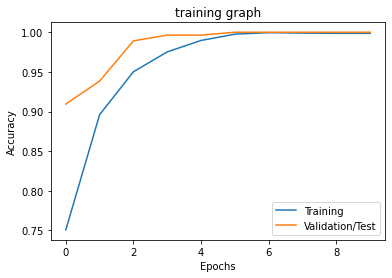

In [31]:
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
plt.plot(train_acc,label = "Training")
plt.plot(val_acc,label = 'Validation/Test')
plt.title('training graph')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

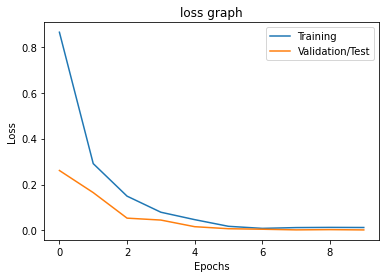

In [32]:
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
plt.plot(train_loss,label = 'Training')
plt.plot(val_loss,label = 'Validation/Test')
plt.title('loss graph')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [33]:
n_model.save('transfer_learning_model.h5')